# Predição de Diabetes com Random Forest

## Visão Geral
Este notebook utiliza o **Pima Indians Diabetes Database**, disponível no [Kaggle.](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
O dataset contém informações médicas de mulheres com pelo menos 21 anos de idade da população Pima (grupo indígena dos EUA), e o objetivo é prever se um paciente possui ou não diabetes com base em atributos clínicos.

As etapas do projeto incluem:
- Análise exploratória e identificação de inconsistências.
- Tratamento de valores inválidos (zeros substituídos por valores ausentes).
- Imputação de valores com a mediana.
- Seleção de variáveis relevantes.
- Treinamento de um modelo **Random Forest**.
- Avaliação usando **AUC ROC, Accuracy, Precision e Recall**.


## Importação de Bibliotecas

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

## Upload e Leitura dos Dados

In [ ]:
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

## Exploração Inicial

In [ ]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Aqui, foi percebido que, nas colunas que têm informações sobre **glicose, pressão sanguínea, grossura da pele, insulina e IMC**, há algumas linhas que possuem o valor 0, o que não faz sentido nenhum.

## Tratamento de Valores Inválidos

In [ ]:
colunas_zeros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_diabetes[colunas_zeros_invalidos] = df_diabetes[colunas_zeros_invalidos].replace(0, np.nan)
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_diabetes[pd.isnull(df_diabetes).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
print(f"Soma de valores faltantes por coluna: \n{df_diabetes.isna().sum()}")

Soma de valores faltantes por coluna: 
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
for coluna in colunas_zeros_invalidos:
  median = df_diabetes[coluna].median()
  df_diabetes[coluna].fillna(median, inplace=True)

/tmp/ipython-input-3118029717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes[coluna].fillna(median, inplace=True)


In [ ]:
print(f"Soma de valores faltantes por coluna: \n{df_diabetes.isna().sum()}")

Soma de valores faltantes por coluna: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Análise Exploratória dos Dados

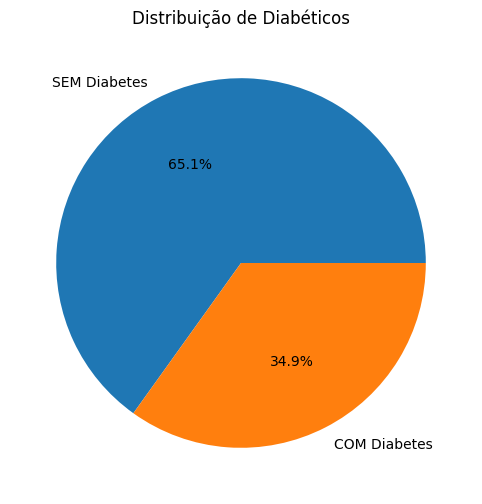

In [ ]:
# Distribuição do Outcome
plt.figure(figsize=(10, 6))
plt.pie(df_diabetes['Outcome'].value_counts(), labels=['SEM Diabetes', 'COM Diabetes'], autopct='%1.1f%%')
plt.title('Distribuição de Diabéticos')
plt.show()

Observações: Como se pode ver, os dados estão desbalanceados, o que afetará na forma em que as métricas Precision e Recall serão usadas.

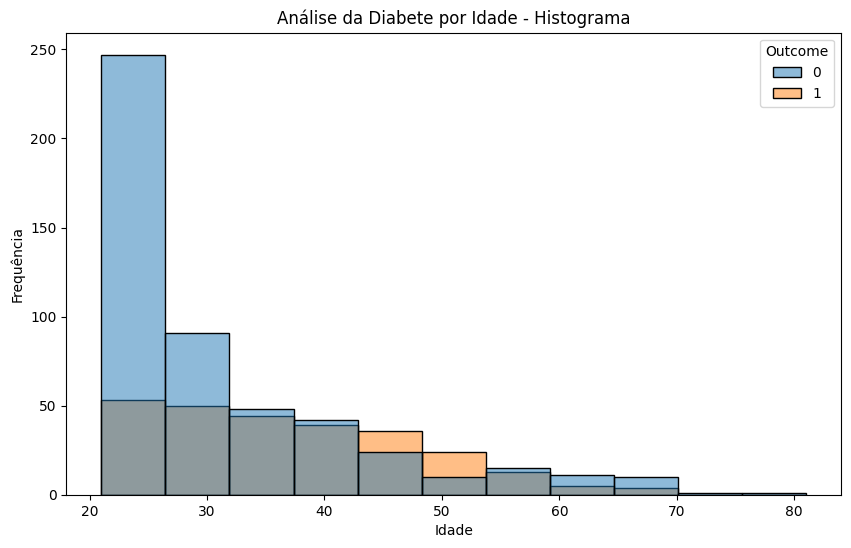

In [ ]:
# Análise de Idade com Diabetes - Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_diabetes, x='Age', hue='Outcome', bins=11)
plt.title('Análise da Diabete por Idade - Histograma')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

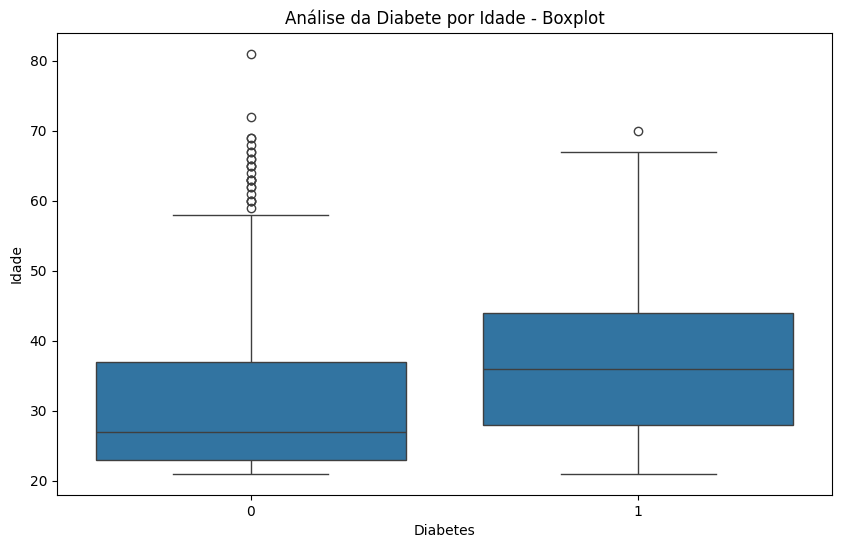

In [ ]:
# Análise de Idade com Diabetes - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Outcome', y='Age')
plt.title('Análise da Diabete por Idade - Boxplot')
plt.xlabel('Diabetes')
plt.ylabel('Idade')
plt.show()

Observações: As pessoas mais velhas têm mais chances de terem diabetes.

Text(0, 0.5, 'Glicose')

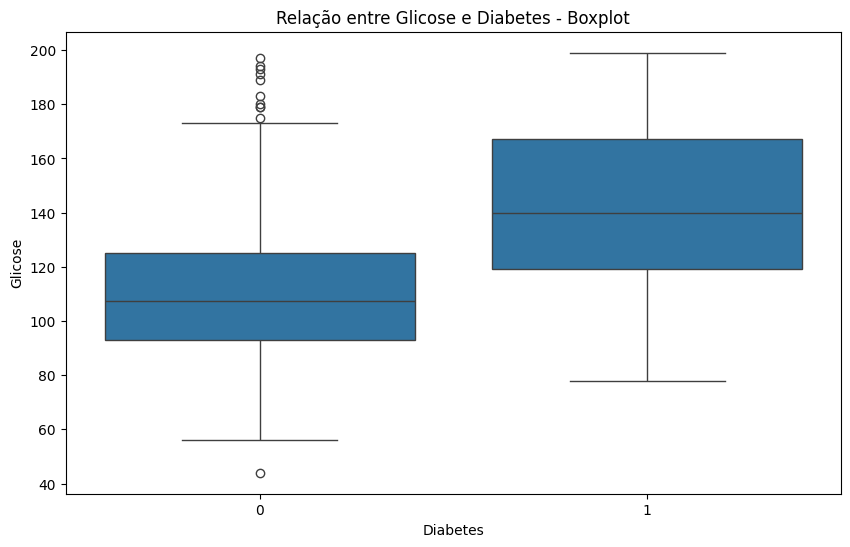

In [ ]:
# Relação entre Glicose e Diabetes - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Outcome', y='Glucose')
plt.title('Relação entre Glicose e Diabetes - Boxplot')
plt.xlabel('Diabetes')
plt.ylabel('Glicose')

Observações: Pessoas com mais glicose no sangue tendem a ter diabetes (obviamente)

Text(0, 0.5, 'IMC')

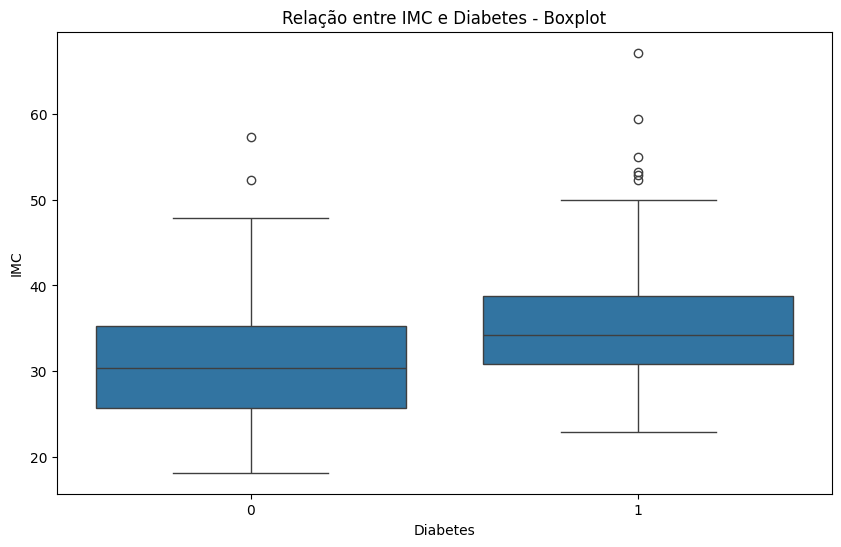

In [ ]:
# Relação entre IMC e DIabetes - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Outcome', y='BMI')
plt.title('Relação entre IMC e Diabetes - Boxplot')
plt.xlabel('Diabetes')
plt.ylabel('IMC')

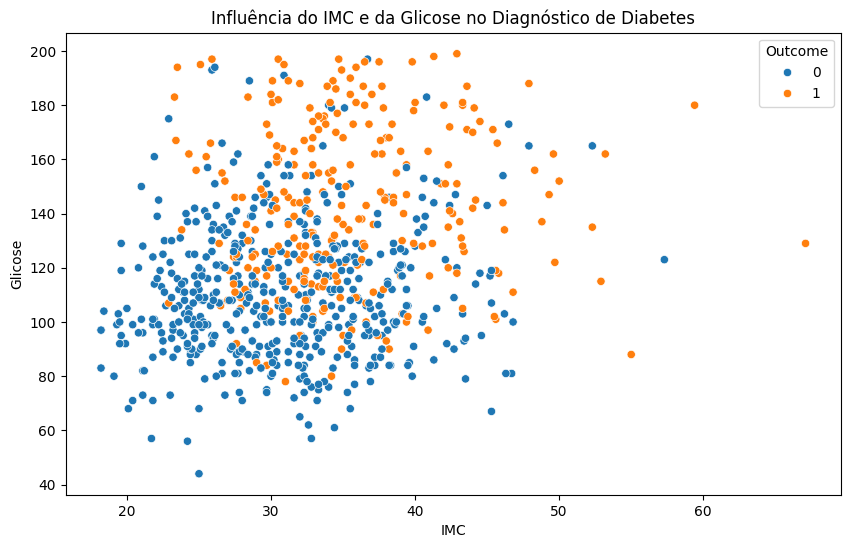

In [ ]:
# Influência do IMC e da Glicose no Diagnóstico de Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diabetes, x='BMI', y='Glucose', hue='Outcome')
plt.title('Influência do IMC e da Glicose no Diagnóstico de Diabetes')
plt.xlabel('IMC')
plt.ylabel('Glicose')
plt.show()

Observações: Há uma certa influência do IMC nas diabetes.

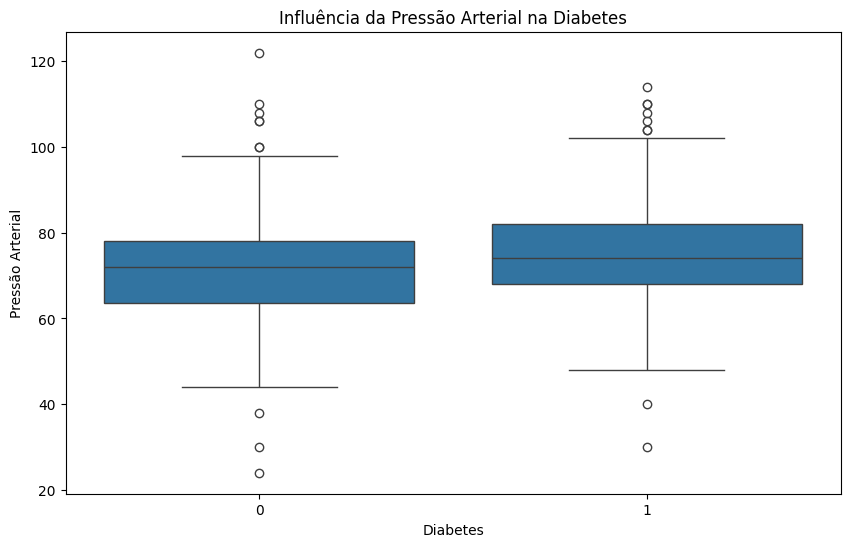

In [ ]:
# Influência da Pressão Arterial na Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Outcome', y='BloodPressure')
plt.title('Influência da Pressão Arterial na Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Pressão Arterial')
plt.show()

Text(0, 0.5, 'Glicose')

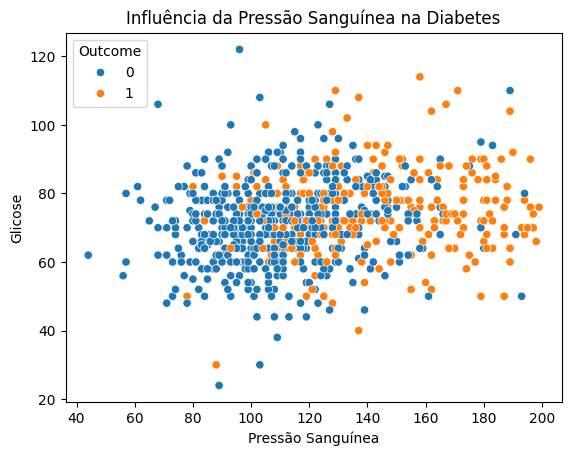

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diabetes, x='Glucose', y='BloodPressure', hue='Outcome')
plt.title('Influência da Pressão Sanguínea na Diabetes')
plt.xlabel('Pressão Sanguínea')
plt.ylabel('Glicose')

Observações: Há uma leve influência da pressão sanguínea.

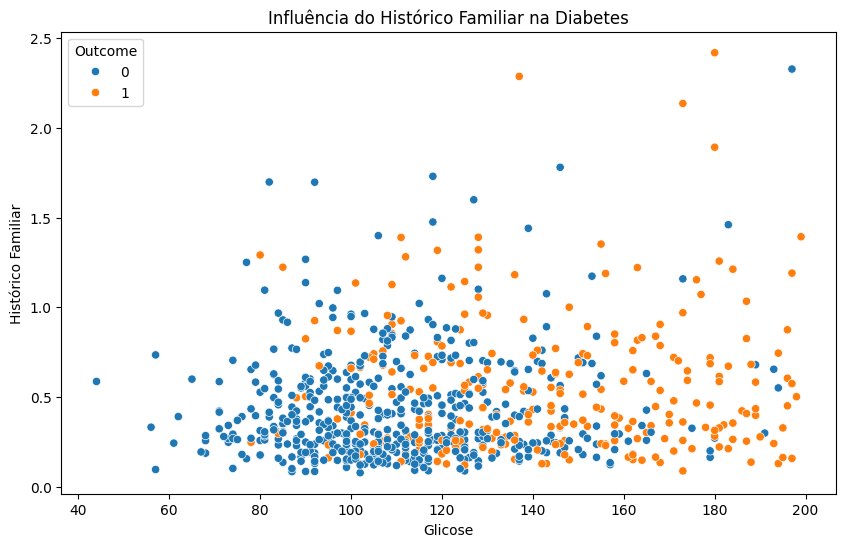

In [ ]:
# Histórico Familiar se relaciona com os casos?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diabetes, x='Glucose', y='DiabetesPedigreeFunction', hue='Outcome')
plt.title('Influência do Histórico Familiar na Diabetes')
plt.xlabel('Glicose')
plt.ylabel('Histórico Familiar')
plt.show()

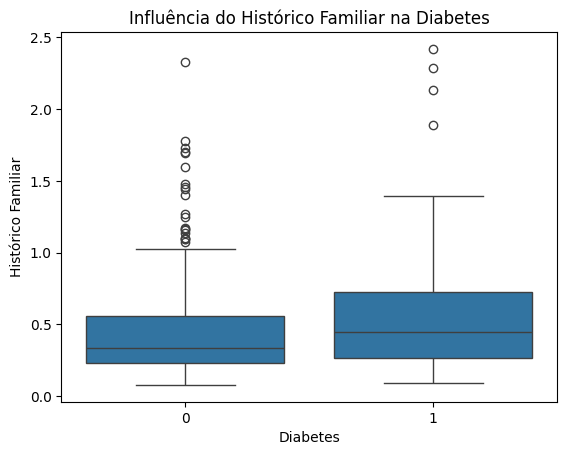

In [ ]:
sns.boxplot(data=df_diabetes, x='Outcome', y='DiabetesPedigreeFunction')
plt.title('Influência do Histórico Familiar na Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Histórico Familiar')
plt.show()

Observações: O histórico familiar importa, porém não tanto assim.

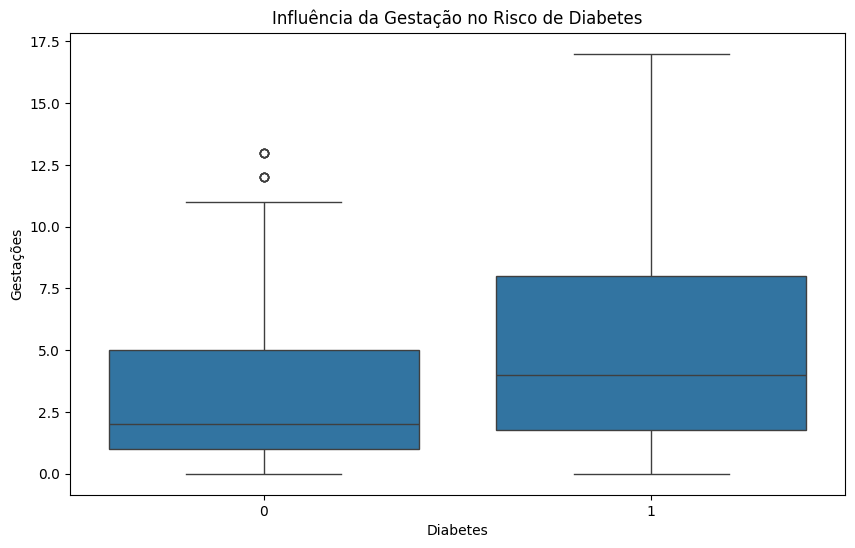

In [ ]:
# Influência da Gestação no Risco de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Outcome', y='Pregnancies')
plt.title('Influência da Gestação no Risco de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Gestações')
plt.show()

Observações: Mulheres grávidas tendem a ter mais diabetes.

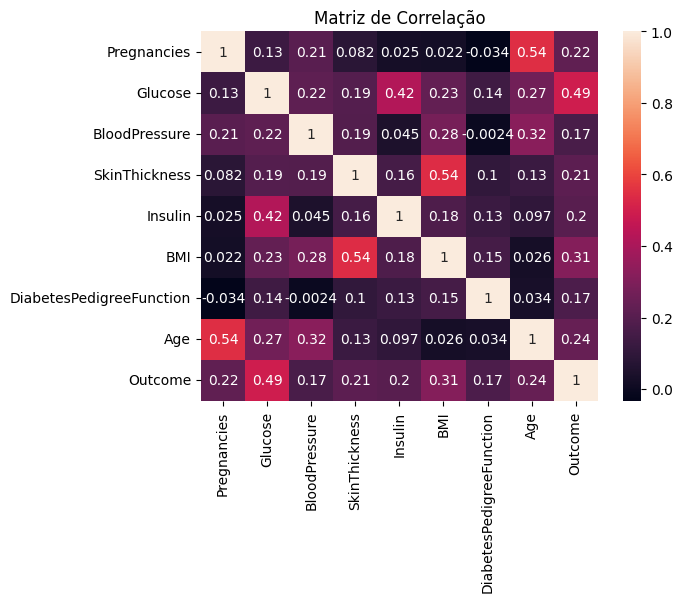

In [ ]:
sns.heatmap(df_diabetes.corr(), annot=True)
plt.title('Matriz de Correlação')
plt.show()

Observações: Num geral, as colunas mais relacionadas com o Outcome são as colunas de glicose, IMC e idade.

# Machine Learing

In [ ]:
y = df_diabetes['Outcome']
X = df_diabetes.drop('Outcome', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_X, train_y)
diabetes_preds = forest_model.predict(val_X)
diabetes_proba = forest_model.predict_proba(val_X)[:, 1]

print(f"""
AUC ROC: {roc_auc_score(val_y, diabetes_proba)}
Accuracy: {accuracy_score(val_y, diabetes_preds)}
Precision: {precision_score(val_y, diabetes_preds, average='weighted')}
Recall: {recall_score(val_y, diabetes_preds, average='weighted')}
""")


AUC ROC: 0.871676067687349
Accuracy: 0.7965367965367965
Precision: 0.795539813721632
Recall: 0.7965367965367965



# Por que essas métricas foram usadas?

- AUC-ROC: Mede a capacidade do modelo em separar as classes, nesse caso, se a pessoa é diabética ou não. É importante em problemas médicos, pois ela olha para a qualidade das probabilidades.
- Acurácia: Medida geral de acerto. Pode ser enganosa num dataset desbalanceado como este, então é apenas um ponto de partida.
- Precision: Mede quantos dos 'diabéticos' que o modelo previu são realmente diabéticos. É importante em contextos em que o custo de um falso-positivo é alto, como no contexto médico.
- Recall: Mede quantos diabéticos reais o modelo conseguiu identificar. Essa métrica ajuda a ter uma chance mínima de falso-negativo, o que pode ser pior que um falso-positivo.

# Teste

In [ ]:
# Caso 1: Mulher jovem saudável sem histórico
paciente_1 = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [85],
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [80],
    'BMI': [22.0],
    'DiabetesPedigreeFunction': [0.25],
    'Age': [26]
})

# Caso 2: Homem de meia-idade com pré-diabetes
paciente_2 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [118],
    'BloodPressure': [84],
    'SkinThickness': [25],
    'Insulin': [95],
    'BMI': [28.5],
    'DiabetesPedigreeFunction': [0.35],
    'Age': [48]
})

# Caso 3: Mulher com diabetes gestacional
paciente_3 = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [155],
    'BloodPressure': [82],
    'SkinThickness': [32],
    'Insulin': [150],
    'BMI': [32.0],
    'DiabetesPedigreeFunction': [0.42],
    'Age': [31]
})

# Caso 4: Idoso com hipertensão leve
paciente_4 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [105],
    'BloodPressure': [92],
    'SkinThickness': [22],
    'Insulin': [75],
    'BMI': [26.8],
    'DiabetesPedigreeFunction': [0.30],
    'Age': [68]
})

# Caso 5: Síndrome metabólica
paciente_5 = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [185],
    'BloodPressure': [96],
    'SkinThickness': [38],
    'Insulin': [220],
    'BMI': [35.2],
    'DiabetesPedigreeFunction': [0.68],
    'Age': [52]
})

# Caso 6: Caso borderline
paciente_6 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [125],
    'BloodPressure': [78],
    'SkinThickness': [26],
    'Insulin': [88],
    'BMI': [27.8],
    'DiabetesPedigreeFunction': [0.45],
    'Age': [45]
})

# Caso 7: Mulher com forte histórico familiar
paciente_7 = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [110],
    'BloodPressure': [76],
    'SkinThickness': [24],
    'Insulin': [85],
    'BMI': [25.5],
    'DiabetesPedigreeFunction': [1.25],
    'Age': [38]
})

# Caso 8: Obesidade mórbida sem outros fatores
paciente_8 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [95],
    'BloodPressure': [82],
    'SkinThickness': [45],
    'Insulin': [110],
    'BMI': [38.6],
    'DiabetesPedigreeFunction': [0.28],
    'Age': [41]
})

# Caso 9: Paciente com resistência insulinica
paciente_9 = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [130],
    'BloodPressure': [88],
    'SkinThickness': [28],
    'Insulin': [280],
    'BMI': [29.8],
    'DiabetesPedigreeFunction': [0.52],
    'Age': [49]
})

# Caso 10: Idoso com múltiplos fatores de risco
paciente_10 = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [142],
    'BloodPressure': [94],
    'SkinThickness': [31],
    'Insulin': [135],
    'BMI': [31.5],
    'DiabetesPedigreeFunction': [0.85],
    'Age': [72]
})

In [ ]:
casos = [paciente_1, paciente_2, paciente_3, paciente_4, paciente_5,
         paciente_6, paciente_7, paciente_8, paciente_9, paciente_10]

nomes = [
    "Mulher Jovem Saudável",
    "Homem Pré-diabético",
    "Diabetes Gestacional",
    "Idoso Hipertenso",
    "Síndrome Metabólica",
    "Caso Borderline",
    "Forte Histórico Familiar",
    "Obesidade Mórbida",
    "Resistência Insulinica",
    "Idoso Múltiplos Fatores"
]

print("=== TESTE DO MODELO ===")
print("=" * 60)

for i, (caso, nome) in enumerate(zip(casos, nomes), 1):
    proba = forest_model.predict_proba(caso)[0]
    predicao = forest_model.predict(caso)[0]

    print(f"\n📋 Caso {i}: {nome}")
    print(f"   Gravidez(es): {caso['Pregnancies'].values[0]}")
    print(f"   Glicose: {caso['Glucose'].values[0]} mg/dL")
    print(f"   Pressão Sanguínea: {caso['BloodPressure'].values[0]} mmHg")
    print(f"   Grossura da Pele: {caso['SkinThickness'].values[0]} mm")
    print(f"   Insulina: {caso['Insulin'].values[0]} mU/L")
    print(f"   IMC: {caso['BMI'].values[0]:.1f} kg/m²")
    print(f"   Histórico Familiar: {caso['DiabetesPedigreeFunction'].values[0]:.2f}")
    print(f"   Idade: {caso['Age'].values[0]} anos")

    print(f"   → Probabilidade: [Não-diab: {proba[0]:.1%}, Diab: {proba[1]:.1%}]")
    print(f"   → Predição: {'🔴 DIABÉTICO' if predicao == 1 else '🟢 NÃO DIABÉTICO'}")
    print(f"   → Chance diabetes: {proba[1]*100:.1f}%")

print("\n" + "=" * 60)

=== TESTE DO MODELO ===

📋 Caso 1: Mulher Jovem Saudável
   Gravidez(es): 1
   Glicose: 85 mg/dL
   Pressão Sanguínea: 70 mmHg
   Grossura da Pele: 20 mm
   Insulina: 80 mU/L
   IMC: 22.0 kg/m²
   Histórico Familiar: 0.25
   Idade: 26 anos
   → Probabilidade: [Não-diab: 96.0%, Diab: 4.0%]
   → Predição: 🟢 NÃO DIABÉTICO
   → Chance diabetes: 4.0%

📋 Caso 2: Homem Pré-diabético
   Gravidez(es): 0
   Glicose: 118 mg/dL
   Pressão Sanguínea: 84 mmHg
   Grossura da Pele: 25 mm
   Insulina: 95 mU/L
   IMC: 28.5 kg/m²
   Histórico Familiar: 0.35
   Idade: 48 anos
   → Probabilidade: [Não-diab: 58.0%, Diab: 42.0%]
   → Predição: 🟢 NÃO DIABÉTICO
   → Chance diabetes: 42.0%

📋 Caso 3: Diabetes Gestacional
   Gravidez(es): 3
   Glicose: 155 mg/dL
   Pressão Sanguínea: 82 mmHg
   Grossura da Pele: 32 mm
   Insulina: 150 mU/L
   IMC: 32.0 kg/m²
   Histórico Familiar: 0.42
   Idade: 31 anos
   → Probabilidade: [Não-diab: 37.0%, Diab: 63.0%]
   → Predição: 🔴 DIABÉTICO
   → Chance diabetes: 63.0%

📋 C

# Conclusão
O modelo usado apresentou desempenho satisfatório, com AUC ROC de 87.16%, acurácia de 79.65%, precisão de 79.55% e recall de 79.65%.  

Apesar dos bons resultados, seria interessante:
- Avaliar com validação cruzada para maior robustez.  
- Comparar o Random Forest com outros modelos (ex.: Regressão Logística, XGBoost).  
